# ETL Python

### Taller

1. Download the file: Departamental serires of population by area for the period 2005 - 2017 from Dane
2. Extract the data corresponding to the total by area for the most recent year
3. Load on a map of Colombia the results in the form of a heat map by population size 
4. Exporting a joblib with the results of the exercise

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from joblib import dump, load

pd.options.display.float_format = '{:.2f}'.format

## Extract

Extract information from [DANE](https://www.dane.gov.co/files/censo2018/proyecciones-de-poblacion/Departamental/anexo-area-proyecciones-poblacion-departamental_2005-2017.xlsx)

### Read file from URL

In [2]:
URL = r'https://www.dane.gov.co/files/censo2018/proyecciones-de-poblacion/Departamental/anexo-area-proyecciones-poblacion-departamental_2005-2017.xlsx'

df = pd.read_excel(URL, skiprows = 11)
print(df)

      DP      DPNOM   AÑO                    ÁREA GEOGRÁFICA    Total
0      5  Antioquia  2005                 Cabecera Municipal  4037095
1      5  Antioquia  2005  Centros Poblados y Rural Disperso  1423748
2      5  Antioquia  2005                              Total  5460843
3      5  Antioquia  2006                 Cabecera Municipal  4106148
4      5  Antioquia  2006  Centros Poblados y Rural Disperso  1421973
...   ..        ...   ...                                ...      ...
1282  99    Vichada  2016  Centros Poblados y Rural Disperso    77332
1283  99    Vichada  2016                              Total   102663
1284  99    Vichada  2017                 Cabecera Municipal    25537
1285  99    Vichada  2017  Centros Poblados y Rural Disperso    79522
1286  99    Vichada  2017                              Total   105059

[1287 rows x 5 columns]


### Undestanding the dataframe

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DP               1287 non-null   int64 
 1   DPNOM            1287 non-null   object
 2   AÑO              1287 non-null   int64 
 3   ÁREA GEOGRÁFICA  1287 non-null   object
 4   Total            1287 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 50.4+ KB
None


## Transform

In [4]:
new_columns = {
    'DP': 'DPTO',
    'DPNOM': 'Department',
    'AÑO': 'Year',
    'ÁREA GEOGRÁFICA': 'Area',
    'Total': 'Total'
}

df.rename(columns=new_columns, inplace=True)
df_filtered = df[['DPTO', 'Department', 'Year', 'Area', 'Total']]
df_filtered

,DPTO,Department,Year,Area,Total
0,5,Antioquia,2005,Cabecera Municipal,4037095
1,5,Antioquia,2005,Centros Poblados y Rural Disperso,1423748
2,5,Antioquia,2005,Total,5460843
3,5,Antioquia,2006,Cabecera Municipal,4106148
4,5,Antioquia,2006,Centros Poblados y Rural Disperso,1421973
...,...,...,...,...,...
1282,99,Vichada,2016,Centros Poblados y Rural Disperso,77332
1283,99,Vichada,2016,Total,102663
1284,99,Vichada,2017,Cabecera Municipal,25537
1285,99,Vichada,2017,Centros Poblados y Rural Disperso,79522


In [5]:
last_year = max(df_filtered['Year'])
print(f'Last year: {last_year}')

Last year: 2017


### Filter dataframe for the most recent year

In [6]:
df_last_year = df_filtered[df_filtered['Year'] >= last_year]
df_last_year

,DPTO,Department,Year,Area,Total
36,5,Antioquia,2017,Cabecera Municipal,4873219
37,5,Antioquia,2017,Centros Poblados y Rural Disperso,1423624
38,5,Antioquia,2017,Total,6296843
75,8,Atlántico,2017,Cabecera Municipal,2341186
76,8,Atlántico,2017,Centros Poblados y Rural Disperso,127243
...,...,...,...,...,...
1246,97,Vaupés,2017,Centros Poblados y Rural Disperso,28009
1247,97,Vaupés,2017,Total,39811
1284,99,Vichada,2017,Cabecera Municipal,25537
1285,99,Vichada,2017,Centros Poblados y Rural Disperso,79522


In [ ]:
# Llenar con 0
# df['DPTO'] = df['DP'].apply(lambda x: str(x).zfill(2))

### Filter only total rows

In [7]:
df_total = df_last_year[df_last_year['Area'] == 'Total']
df_total

,DPTO,Department,Year,Area,Total
38,5,Antioquia,2017,Total,6296843
77,8,Atlántico,2017,Total,2468429
116,11,"Bogotá, D.C.",2017,Total,7337449
155,13,Bolívar,2017,Total,2035711
194,15,Boyacá,2017,Total,1207665
233,17,Caldas,2017,Total,991363
272,18,Caquetá,2017,Total,401099
311,19,Cauca,2017,Total,1448837
350,20,Cesar,2017,Total,1162415
389,23,Córdoba,2017,Total,1763053


### Using Geopandas to create heat map

In [8]:
departments_shapes = gpd.read_file('./depto/depto.shp')
departments_shapes

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,63351855546.89,1963728.84,6335185.55,"POLYGON ((754872.146 1445316.567, 755882.980 1..."
1,08,ATLANTICO,3360765349.96,240936.17,336076.53,"POLYGON ((913511.163 1637374.172, 912870.293 1..."
2,11,SANTAFE DE BOGOTA D.C,1650947779.13,323322.54,165094.78,"POLYGON ((1006435.805 1021680.392, 1006048.264..."
3,13,BOLIVAR,26141894527.75,1309427.97,2614189.45,"POLYGON ((881889.901 1644370.282, 882454.535 1..."
4,15,BOYACA,23352582463.94,1364539.91,2335258.25,"POLYGON ((1206427.930 1268967.315, 1207191.680..."
5,17,CALDAS,7558199875.56,603282.46,755819.99,"POLYGON ((931978.603 1127612.742, 933119.333 1..."
6,18,CAQUETA,90180868828.82,1888506.90,9018086.88,"POLYGON ((931968.406 767660.187, 932356.113 76..."
7,19,CAUCA,29742787301.20,1243388.95,2974278.73,"MULTIPOLYGON (((540370.415 821285.843, 536207...."
8,20,CESAR,22973095679.79,1080343.68,2297309.57,"POLYGON ((1087325.026 1692140.333, 1087516.283..."
9,23,CORDOBA,25059485605.51,814093.37,2505948.56,"POLYGON ((809020.232 1533968.656, 810161.780 1..."


In [9]:
departments_shapes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO        33 non-null     object  
 1   NOMBRE_DPT  33 non-null     object  
 2   AREA        33 non-null     float64 
 3   PERIMETER   33 non-null     float64 
 4   HECTARES    33 non-null     float64 
 5   geometry    33 non-null     geometry
dtypes: float64(3), geometry(1), object(2)
memory usage: 1.7+ KB


In [10]:
departments_shapes['DPTO'] = departments_shapes['DPTO'].astype(int)
departments_shapes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO        33 non-null     int64   
 1   NOMBRE_DPT  33 non-null     object  
 2   AREA        33 non-null     float64 
 3   PERIMETER   33 non-null     float64 
 4   HECTARES    33 non-null     float64 
 5   geometry    33 non-null     geometry
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 1.7+ KB


In [11]:
df_merge = departments_shapes.merge(df_total, on='DPTO')
df_merge.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,Department,Year,Area,Total
0,5,ANTIOQUIA,63351855546.89,1963728.84,6335185.55,"POLYGON ((754872.146 1445316.567, 755882.980 1...",Antioquia,2017,Total,6296843
1,8,ATLANTICO,3360765349.96,240936.17,336076.53,"POLYGON ((913511.163 1637374.172, 912870.293 1...",Atlántico,2017,Total,2468429
2,11,SANTAFE DE BOGOTA D.C,1650947779.13,323322.54,165094.78,"POLYGON ((1006435.805 1021680.392, 1006048.264...","Bogotá, D.C.",2017,Total,7337449
3,13,BOLIVAR,26141894527.75,1309427.97,2614189.45,"POLYGON ((881889.901 1644370.282, 882454.535 1...",Bolívar,2017,Total,2035711
4,15,BOYACA,23352582463.94,1364539.91,2335258.25,"POLYGON ((1206427.930 1268967.315, 1207191.680...",Boyacá,2017,Total,1207665


In [12]:
df_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO        33 non-null     int64   
 1   NOMBRE_DPT  33 non-null     object  
 2   AREA        33 non-null     float64 
 3   PERIMETER   33 non-null     float64 
 4   HECTARES    33 non-null     float64 
 5   geometry    33 non-null     geometry
 6   Department  33 non-null     object  
 7   Year        33 non-null     int64   
 8   Area        33 non-null     object  
 9   Total       33 non-null     int64   
dtypes: float64(3), geometry(1), int64(3), object(3)
memory usage: 2.8+ KB


## Load

### Heat Map

<AxesSubplot:title={'center':'Colombia heat map by population, 2017'}>

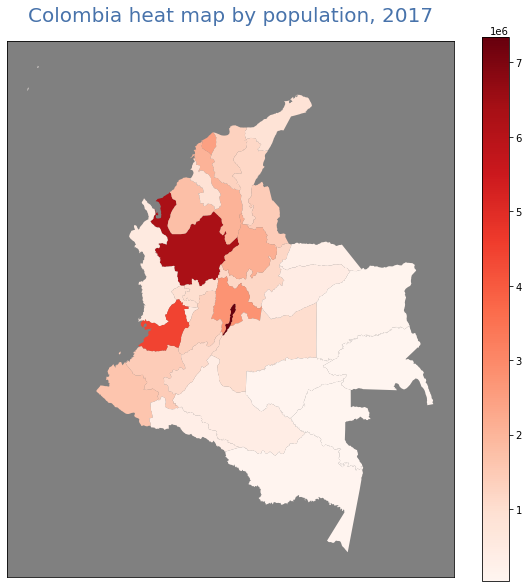

In [13]:
# Heat map size
fig, ax = plt.subplots(figsize=(10, 10))
 
# Title and labels
ax.set_title(f'Colombia heat map by population, {last_year}', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_facecolor('gray')
ax.tick_params(left = False,labelleft = False ,
                           labelbottom = False, bottom = False)

# Plot final map
df_merge.plot(column='Total', cmap='Reds', ax=ax, legend=True, zorder=5)

In [14]:
df_results = df_merge[['Department', 'Total']]
df_results = df_results.sort_values('Total', ascending=False)
df_results

,Department,Total
2,"Bogotá, D.C.",7337449
0,Antioquia,6296843
23,Valle del Cauca,4432549
10,Cundinamarca,2773285
1,Atlántico,2468429
20,Santander,2146496
3,Bolívar,2035711
9,Córdoba,1763053
16,Nariño,1621984
7,Cauca,1448837


### Save results with JobLib

In [15]:
folder = './joblib_results'
try:
    os.mkdir(folder)
except FileExistsError:
    pass

print('Saving results data frame')

data_filename_df = os.path.join(folder, 'df_results.joblib')
dump(df_results, data_filename_df)

print('Saving heat map')

data_filename_heatmap = os.path.join(folder, 'heat_map.joblib')
dump(df_merge, data_filename_heatmap)

Saving results data frame
Saving heat map


['./joblib_results/heat_map.joblib']

In [16]:
data_df = load(data_filename_df, mmap_mode='r')
data_df

,Department,Total
2,"Bogotá, D.C.",7337449
0,Antioquia,6296843
23,Valle del Cauca,4432549
10,Cundinamarca,2773285
1,Atlántico,2468429
20,Santander,2146496
3,Bolívar,2035711
9,Córdoba,1763053
16,Nariño,1621984
7,Cauca,1448837


In [17]:
data_heatmap = load(data_filename_heatmap, mmap_mode='r')
data_heatmap

ValueError: assignment destination is read-only

<Figure size 720x720 with 2 Axes>